Please follow the rules/instructions for making the assignments. This means, for every exercise:

- Make sure the code is **well-documented**
- Update the README file, found in the same directory as the assignment, this means:
    - Describe the objective of the assignment
    - Provide instructions on how to run your code
    - Include any other relevant notes or dependencies

Also, please be mindful of the rules for the use of Generative AI:
- You may use generative AI tools (e.g., ChatGPT, GitHub Copilot, etc.) in your assignments under the following conditions:
    - Clearly indicate where and how you used generative AI
    - Save and submit the AI conversation alongside your assignment (upload the transcript alongside your assignment)
    - Remember: Using AI tools should support your learning, not replace it. Make sure the work you submit reflects your group’s understanding. All group members are still responsible for understanding and being able to explain all submitted content.

***The name of the group member responsible for each assignment is written behind the exercise number.***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

# Assignment task: Recovery rate investigation

Using the **SIRD** model from the practical as a starting point, we will investigate how the recovery rate affects epidemic outcomes. <br>
This model can be found in the next coding cell:

In [2]:
def sird_model(y, t, beta, gamma, mu):
    """
    SIRD model with death compartment

    TODO: Adapt the SIR model to include deaths

    Additional parameter:
    - mu: mortality rate

    New compartment:
    - D: Deaths
    """
    S, I, R, D = y  # Note: now 4 compartments
    N = S + I + R + D
    
    dSdt = - beta * S * I / N
    dIdt = beta * S * I / N - gamma * I- mu * I
    dRdt = gamma * I
    dDdt = mu * I

    return dSdt, dIdt, dRdt, dDdt

# Test your SIRD function
test_result = sird_model([990, 10, 0, 0], 0, 0.3, 0.1, 0.01)
print(f"SIRD test result: {test_result}")
print("You should see 4 numbers!")

SIRD test result: (-2.97, 1.87, 1.0, 0.1)
You should see 4 numbers!


## Part 1: Parameter analysis function (50 points) - Evi Levels

**Task:** Create a function called `analyze_recovery_rates()` that systematically explores different recovery rates.

In [3]:
def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """
    Analyze epidemic outcomes for different recovery rates.

    Parameters:
    -----------
    beta : float
        Transmission rate
    mu : float  
        Mortality rate
    N : int
        Total population
    I0 : int
        Initial infected individuals
    simulation_days : int
        Simulation duration in days

    Returns:
    --------
    pandas.DataFrame
        Results summary for each recovery rate
    """
    # Your implementation here
    
    # Time points
    t = np.linspace(0, simulation_days, simulation_days)

    # Test recovery rates
    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]

    plt.figure(figsize=(10, 6))
    results = []

    for gamma in gamma_values:
        # Initial conditions
        S0 = N - I0
        R0 = 0
        D0 = 0 
        y0 = [S0, I0, R0, D0]   

        #Solve SIRD equations
        sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
        S, I, R, D = sol.T

        # Calculate results summary
        peak_infected = np.max(I) # Peak number of infectious individuals
        peak_day = np.argmax(I) # Day when peak occurs
        total_deaths = D[-1] # Total deaths at end of simulation
        R0 = beta / gamma # Basic reproduction number (R₀ = β/γ)

        results.append({
            'gamma': gamma,
            'R0': R0,
            'peak_infected': peak_infected,
            'peak_day': peak_day,
            'total_deaths': total_deaths
        })

        # Generate a publication-quality plot showing all epidemic curves
        # To keep the plot as clear as possible, we only plot the infections
        plt.plot(t, I, label=f'Infectious (gamma={gamma})', linewidth=2)

    plt.xlabel('Time (days)')
    plt.ylabel('Infectious Population')
    plt.title('Effect of Recovery Rate on Epidemic Curve (SIRD Model)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Generate DataFrame
    epidemic_df = pd.DataFrame(results)
    # Return DataFrame
    return epidemic_df

## Part 2: Scenario comparison (30 points) - Emma Szilagyi

**Scenario A:**

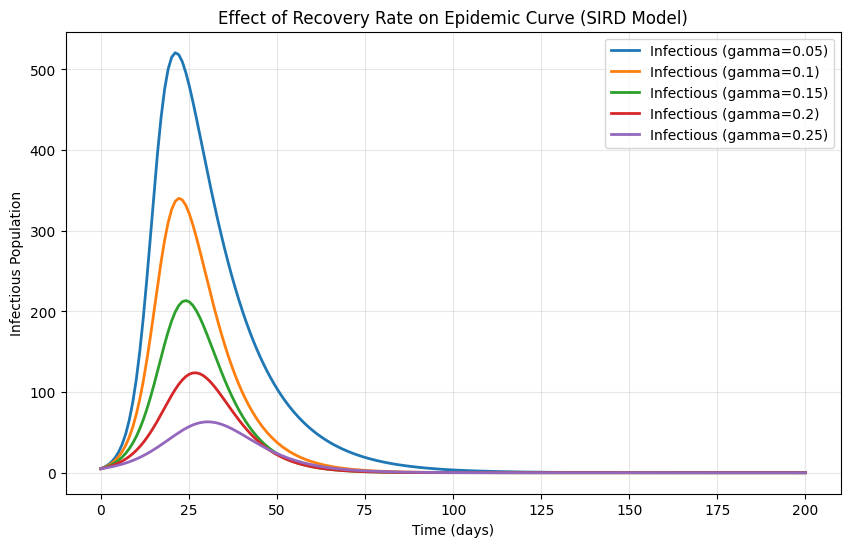

,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,8.000000,520.757922,21,284.757434
1,0.10,4.000000,340.259908,22,159.892366
2,0.15,2.666667,213.467271,24,102.610885
3,0.20,2.000000,123.830763,27,67.423926
4,0.25,1.600000,63.070351,30,42.694003


In [6]:
beta=0.4
mu=0.02
N=1000
I0=5
simulation_days=200

analyze_recovery_rates(beta, mu, N, I0, simulation_days)

**Scenario B:**

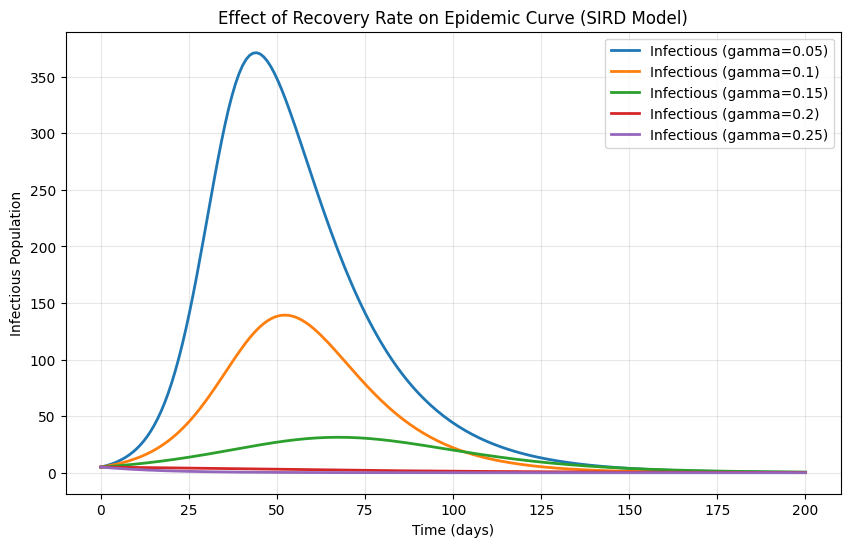

,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,4.000000,371.304875,44,88.225824
1,0.10,2.000000,139.343938,52,36.700237
2,0.15,1.333333,31.343160,67,13.642779
3,0.20,1.000000,5.000000,0,1.832013
4,0.25,0.800000,5.000000,0,0.433167


In [7]:
beta=0.2
mu=0.005
N=1000
I0=5
simulation_days=200

analyze_recovery_rates(beta, mu, N, I0, simulation_days)

**Which scenario is worse for public health and why?**

Based on the plots created above we can say that scenario A is way worse for the public health than scenario B for the following reasons:

-**Number of deaths**: We can tell an epidemic is critical based on the deaths count. In our example, in Scenario A we have a higher number of total deaths than in Scenario B. It always has a higher number of deaths across all the gamma values which already shows that Scenario B is better than A.

-**Peak Infectious**: Another reason is that we can see how many infected individuals we have at the same time in the peak, and an overwealhming number, can disturb the heath system. This is exactly what is happening in Scenario A, where for a low recovery gamma like 0.005, we have a very high infected peak compared to the one in Scenario B where it is significantly lower.

-**Average number of new infections**: Having a high R0 suggests we have a more infectious disease. No matter the recovery rate, Scenario A always has a higher R0 meaning it has a more infectious epidemic. Comapring all the values from Scenario B to the ones from A we can see it is consistemntly lower across all the gamma values.

## Part 3: Policy recommendations (20 points)